In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Load Data
df = pd.read_csv("../data/creditcard.csv")

## Feature Investigation - Heuristic Method

In [3]:
def count_anomaly(df):
    anomalies = df[df["Class"]==1]
    no_anomalies = df[df["Class"]==0]
    return anomalies.shape[0], no_anomalies.shape[0]

In [81]:
#Function for cutting
def count_anomaly(df):
    anomalies = df[df["Class"]==1]
    no_anomalies = df[df["Class"]==0]
    return anomalies.shape[0], no_anomalies.shape[0]

def cutting(df, column_name, value):
    d1 = df[df[column_name] >= value]
    d2 = df[df[column_name] < value]
    a1, n1 = count_anomaly(d1)
    a2, n2 = count_anomaly(d2)
    return a1, n1, a2, n2

#Evaluating the cut
def cal_f1(tuple):
    a1, n1, a2, n2 = tuple
    if n2 < n1:
        a2, n2, a1, n1 = tuple
    if a1 == 0:
        F1 = 0
    else:
        precision = a1/(a1+n1)
        recall = a1/(a1+a2)
        F1 = 2 * (precision * recall) / (precision + recall)
    return F1

#Search for the best cut
def best_cut_search(df, column_name, start, end, n=20):
    _ = np.linspace(start, end, num = n)
    F =[]
    for value in _:
        F.append(cal_f1(cutting(df,column_name, value)))
    return _[np.argmax(F)], max(F)

## Illustration

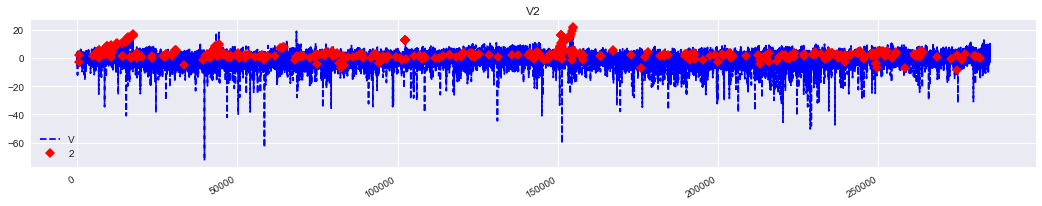

In [67]:
anomalies = df[df["Class"]==1]
columns=['V2']
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()

In [68]:
cutting(df,"V2", min(anomalies["V2"]))

(492, 283307, 0, 1008)

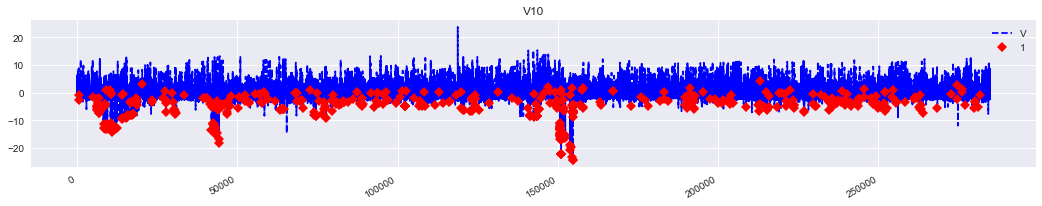

In [74]:
anomalies = df[df["Class"]==1]
columns=['V10']
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()

In [75]:
cutting(df,"V10", -10)

(406, 284296, 86, 19)

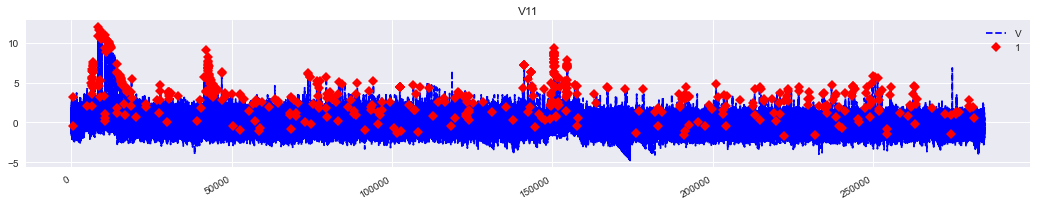

In [76]:
anomalies = df[df["Class"]==1]
columns=['V11']
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()

In [77]:
cutting(df,"V11", 5)

(135, 28, 357, 284287)

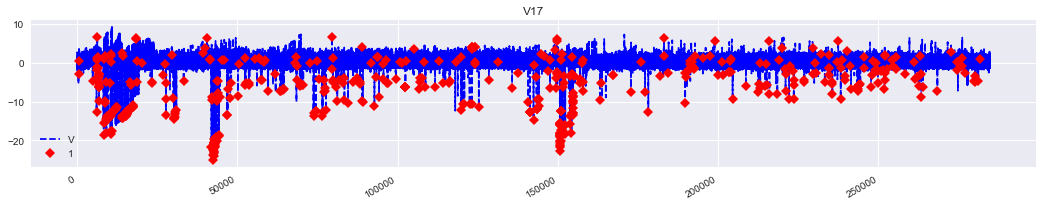

In [78]:
anomalies = df[df["Class"]==1]
columns=['V17']
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()

In [50]:
cutting(df,"V17", -3)

(163, 284217, 329, 98)

In [51]:
cal_f1(cutting(df,"V17", -3))

0.7159956474428727

In [52]:
best_cut_search(df, "V17", -2, -3)

(-2.7894736842105265, 0.721030042918455)

In [53]:
best_cut_search(df, "V10", -20, 0)

(-3.157894736842106, 0.712871287128713)

In [96]:
### This can take long time depend on the setting of number of cut you try
columns=df.columns
cut_table = []
for col in columns:
    value, f1 = best_cut_search(df, col, min(df[col]), max(df[col]), 10)
    cut_table.append([col, value, f1])

In [97]:
cut_table

[['Time', 19199.11111111111, 0.008274435442165143],
 ['V1', -10.625612147131058, 0.1202672605790646],
 ['V2', 11.527344928999653, 0.14100185528756956],
 ['V3', -9.85349083225104, 0.2750642673521851],
 ['V4', 6.849337263923078, 0.27873563218390807],
 ['V5', -14.713324985936268, 0.0919931856899489],
 ['V6', -4.057810050997102, 0.07056638811513463],
 ['V7', -7.080189234248856, 0.25831702544031315],
 ['V8', 9.648994273967006, 0.08118081180811808],
 ['V9', -3.7577126764441324, 0.40422322775263947],
 ['V10', -3.106751967068835, 0.5513866231647635],
 ['V11', 4.544963560989912, 0.47907647907647904],
 ['V12', -3.9436553505726906, 0.5971830985915493],
 ['V13', -2.9210447252287066, 0.006122448979591836],
 ['V14', -5.996062582685354, 0.6339285714285714],
 ['V15', -3.012646201820768, 0.005802707930367505],
 ['V16', -3.6481991724528022, 0.544431946006749],
 ['V17', -2.2185822894597003, 0.6711409395973155],
 ['V18', -3.0366058737318324, 0.4044692737430168],
 ['V19', 2.746305014554875, 0.0512284370099

In [98]:
from operator import itemgetter
sorted(cut_table, key=itemgetter(2))[::-1]

[['Class', 0.1111111111111111, 1.0],
 ['V17', -2.2185822894597003, 0.6711409395973155],
 ['V14', -5.996062582685354, 0.6339285714285714],
 ['V12', -3.9436553505726906, 0.5971830985915493],
 ['V10', -3.106751967068835, 0.5513866231647635],
 ['V16', -3.6481991724528022, 0.544431946006749],
 ['V11', 4.544963560989912, 0.47907647907647904],
 ['V18', -3.0366058737318324, 0.4044692737430168],
 ['V9', -3.7577126764441324, 0.40422322775263947],
 ['V4', 6.849337263923078, 0.27873563218390807],
 ['V3', -9.85349083225104, 0.2750642673521851],
 ['V7', -7.080189234248856, 0.25831702544031315],
 ['V2', 11.527344928999653, 0.14100185528756956],
 ['V1', -10.625612147131058, 0.1202672605790646],
 ['V5', -14.713324985936268, 0.0919931856899489],
 ['V8', 9.648994273967006, 0.08118081180811808],
 ['V6', -4.057810050997102, 0.07056638811513463],
 ['V27', 1.5133773134035202, 0.0537955768081291],
 ['V19', 2.746305014554875, 0.05122843700993204],
 ['V21', -7.260061566090155, 0.031746031746031744],
 ['V22', 3.

In [110]:
[x[0] for x in sorted(cut_table, key=itemgetter(2))[::-1][1:8]]

['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V18']

In [111]:
# Do more thorough cut on top values
columns=[x[0] for x in sorted(cut_table, key=itemgetter(2))[::-1][1:10]]
cut_table = []
for col in columns:
    value, f1 = best_cut_search(df, col, min(df[col]), max(df[col]), 50)
    cut_table.append([col, value, f1])

In [112]:
sorted(cut_table, key=itemgetter(2))[::-1]

[['V17', -2.6868316176202107, 0.7209302325581396],
 ['V12', -4.6054539306154965, 0.6832151300236406],
 ['V14', -5.8611823489345785, 0.6379690949227373],
 ['V10', -3.8739487695752146, 0.6041237113402063],
 ['V16', -3.8621105060250525, 0.5703794369645043],
 ['V11', 3.7823156405174663, 0.5674653215636822],
 ['V18', -3.8608584307873084, 0.43851851851851853],
 ['V9', -3.3627594665753175, 0.42513368983957217],
 ['V4', 5.826275348650177, 0.3613636363636364]]

## Combining Cut

In [117]:
df_ = df.loc[(df["V17"] < -2.6868316176202107) | (df["V12"] < -4.6054539306154965)]

In [118]:
count_anomaly(df[df["V17"] < -2.7894736842105265])

(336, 104)

In [119]:
count_anomaly(df_)

(368, 125)

In [120]:
df_ = df.loc[(df["V17"]<-2.6868316176202107)|(df["V12"]<-4.6054539306154965)|(df["V14"]<-5.8611823489345785)]

In [121]:
count_anomaly(df_)

(395, 206)

Combining more increase precisions and f1 slowly going down